In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ab-testing-dataset/test_group.csv
/kaggle/input/ab-testing-dataset/control_group.csv


Using a Z-test for proportions, I compared the conversion rates of the Control and Test campaigns. The Test campaign showed a higher conversion rate, and the difference was statistically significant at α = 0.05 (Significance Level)

In [4]:
#When is a difference real and when is it just luck(random distribution)?
import pandas as pd

control = pd.read_csv("/kaggle/input/ab-testing-dataset/control_group.csv",sep=';')
test = pd.read_csv("/kaggle/input/ab-testing-dataset/test_group.csv",sep=';')
#/kaggle/input/<dataset-folder>/<file-name>


In [5]:
control.head()
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [6]:
control.columns
test.columns


Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [7]:
#Moving towards our Metric which is Conversion Rate 
control_clicks = control['# of Website Clicks'].sum()
control_purchase = control['# of Purchase'].sum()
test_clicks = test['# of Website Clicks'].sum()
test_purchase = test['# of Purchase'].sum()

In [8]:
#Calculating Conversion Rate 
control_CR=control_purchase/control_clicks
test_CR=test_purchase/test_clicks
control_CR,test_CR

(np.float64(0.09825473257162855), np.float64(0.08640658672708183))

In [9]:
#Now Appplying Z-Test as our prediction is of binary type (Yes/No)
#1 Z-test=observed change / Standard Error 
from statsmodels.stats.proportion import proportions_ztest
event_happened = [control_purchase,test_purchase] #event_happen = [purchases]
total_chances  = [control_clicks,test_clicks] # total_chances = [clicks]
z_stat,p_value=proportions_ztest(
    event_happened,
    total_chances,
    alternative = 'larger'
)
z_stat,p_value

#'larger'	Test > Control	Right-tailed
#'smaller'	Test < Control	Left-tailed
#'two-sided'	Test ≠ Control	Two-tailed


(np.float64(11.8386745814439), np.float64(1.2315737814213374e-32))

In [10]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0: Test campaign has a significantly higher conversion rate.")
else:
    print("Fail to reject H0: No significant difference between campaigns.")


Reject H0: Test campaign has a significantly higher conversion rate.


In [11]:
summary = pd.DataFrame({
    "Campaign": ["Control", "Test"],
    "Clicks": [control_clicks, test_clicks],
    "Purchases": [control_purchase, test_purchase],
    "Conversion Rate": [control_CR, test_CR]
})

summary

,Campaign,Clicks,Purchases,Conversion Rate
0,Control,154303.0,15161.0,0.098255
1,Test,180970.0,15637.0,0.086407


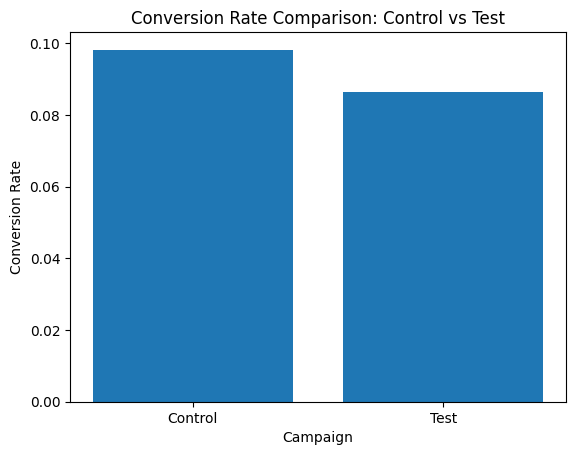

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(summary["Campaign"], summary["Conversion Rate"])
plt.xlabel("Campaign")
plt.ylabel("Conversion Rate")
plt.title("Conversion Rate Comparison: Control vs Test")

plt.xticks(rotation=0)

plt.show()
